# Lab 4

## Before Lab
- (compulsory) Use the methods explained in lectures and tutorials (or any additional sources) on classifier
testing and evaluation. Run any classifier model of your choice on your data set, and record the major
metrics: accuracy, TP rate, FP rate, precision, recall, F measure, the ROC area etc (as explained in
the lectures). Make conclusions. You may want to continue your experiments to choose the best data
processing steps or features for your data; but this time based on further evaluation metrics.
- (compulsory) Plot your confusion matrix and make comparisons between different evaluation metrics.
Which ones seem more suitable for your data set?
- (optional for BSc, compulsory for MSc) Compare between using train/test split on your data set and
using cross validation. Report your results and summarize findings.
- (optional for BSc and MSc) Scikit-learn provides a Pipeline class for sequence of transformations. This
can help you automate some experiments and test various settings. You could define your transformation
pipeline to deal with missing values, attribute combination, normalization,. . . .etc. Hint: P3 Tutorial End
to End Machine Learning presents some useful pipelines. Adapt and use for your data set.
Also see: Aurelien Geron “Hands-on Machine Learning”, Chapter 2 “End-to-End Machine Learning
Project,” with accompanying code on GitHub.

## During Lab
- Share your proposed solutions, discuss which evaluation techniques worked best.
- Make conclusions. You may want to think about the following questions: Now that you have expanded
your experiments to include more evaluation metrics/techniques, did you learn something new about
your data set? For example could you reveal more information regarding data pre-processing or feature
selection? Which evaluation metrics are more important/reliable for your application? Which are less
reliable evaluation metrics? How do they work to indicate the performance related to different classes?
You will get more marks for more interesting and “out of the box” questions and answers.
- The tutors will mark: quality of your code for model testing and evaluation and the quality of the
summary you provide as a group at the end of the lab.

## Notes
- 

# Imports 

In [43]:
# conda env create -f env.yaml 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [44]:
df = pd.read_csv("Data/processed_data.csv")

df1 = pd.read_csv("Data/data1.csv")
df2 = pd.read_csv("Data/data2.csv")
df3 = pd.read_csv("Data/data3.csv")
df4 = pd.read_csv("Data/data4.csv")

# Statistical Summary and Correlation

In [45]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,...,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.260536,0.433908,16.726054,0.272989,0.706897,0.884100,2.603448,2.387931,1.522989,1.970307,...,0.124521,0.039272,0.559387,0.279693,0.062261,0.247126,0.103448,0.237548,0.697318,0.069923
std,0.439138,0.495850,1.239975,0.445708,0.455404,0.320259,1.124907,1.099938,0.731727,0.834353,...,0.330333,0.194335,0.496699,0.449064,0.241744,0.431548,0.304689,0.425785,0.459639,0.255140
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,0.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


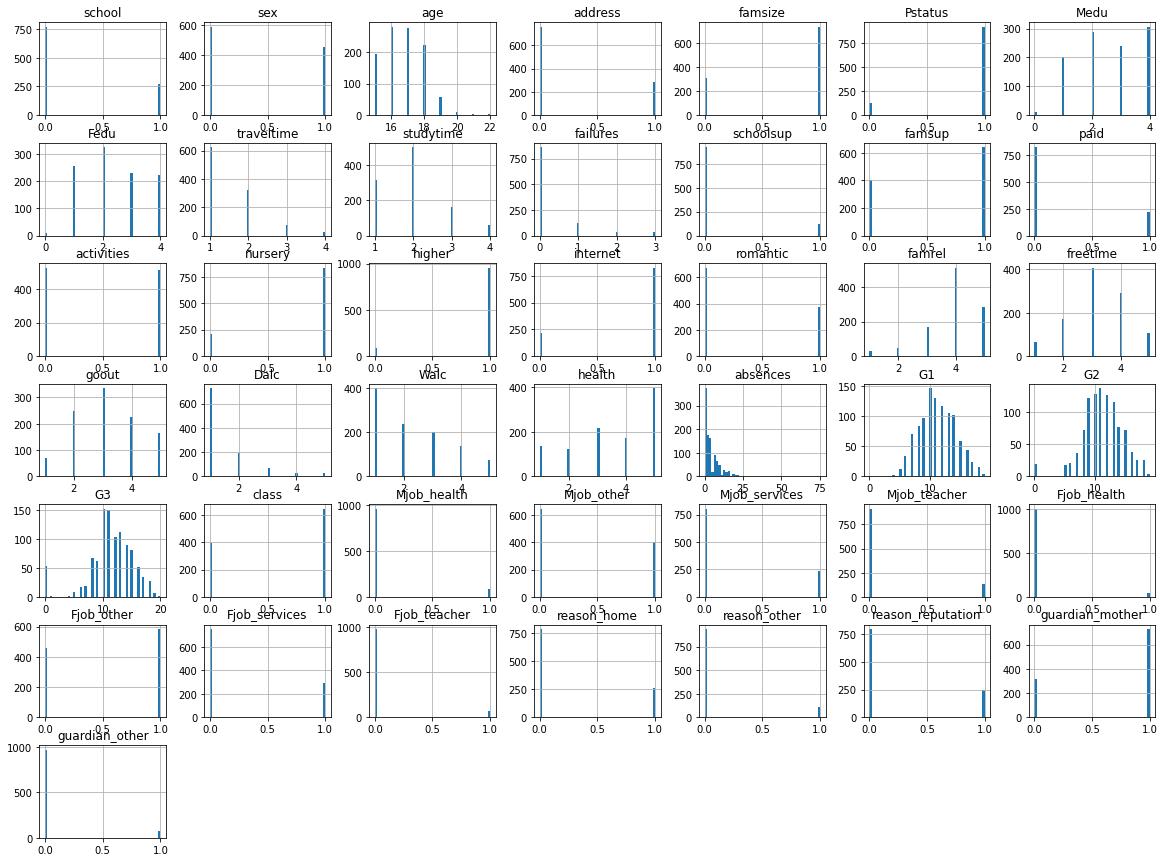

In [46]:
df.hist(bins=50, figsize=(20,15))
plt.show()

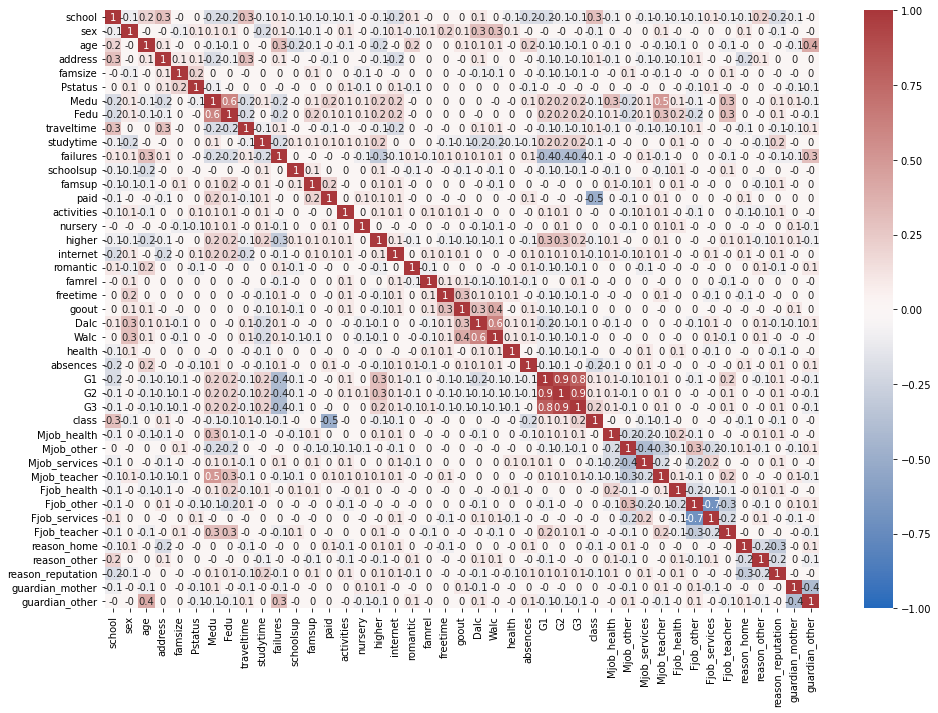

In [47]:
corr_matrix = df.corr().round(1)

# Resizing the heatmap
fig, ax = plt.subplots(figsize=(16,11))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=ax)
plt.show()

In [48]:
print(df.corr()["G3"].sort_values(ascending = False, key=abs))

G3                   1.000000
G2                   0.910743
G1                   0.809142
failures            -0.383145
higher               0.236578
Medu                 0.201472
class                0.187166
studytime            0.161629
Fedu                 0.159796
Dalc                -0.129642
school              -0.127114
age                 -0.125282
reason_reputation    0.121303
address             -0.117696
Walc                -0.115740
internet             0.107064
traveltime          -0.102627
Fjob_teacher         0.101361
Mjob_health          0.101349
romantic            -0.098363
goout               -0.097877
guardian_other      -0.088445
Mjob_teacher         0.084521
health              -0.080079
schoolsup           -0.079346
Mjob_other          -0.066051
freetime            -0.064890
famsize             -0.061209
famrel               0.054461
paid                -0.049388
absences            -0.045671
Mjob_services        0.045015
reason_other        -0.043097
Fjob_healt

# Modelling and Testing

In [62]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve, plot_confusion_matrix

features = df["studytime"].to_numpy().reshape(-1,1)
target = df["reason_reputation"]
target -= np.mean(target)
tmean = target
target = target > 0
target = target.to_numpy().reshape(-1,1)

In [63]:
(x_train, x_test, y_train, y_test) = train_test_split(features, target, test_size=0.25)

model = KNeighborsClassifier()
model.fit(x_train, y_train)


c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

Overall accuracy:  0.7432950191570882
recall:  0.9693877551020408
Fall out or false positive rate 0.9384615384615385
Precision 0.7569721115537849
Recall:  0.9693877551020408
F-measure:  0.9693877551020408
True negative rate 0.06153846153846154
Negative predictive value 0.4
False negative rate 0.030612244897959183
False discovery rate 0.24302788844621515


c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


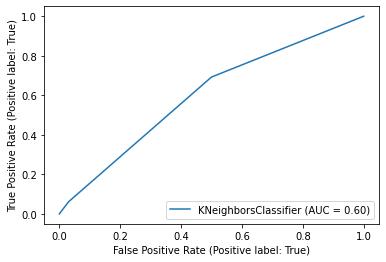

In [57]:

predicted = model.predict(x_test)

#I obtain the confusion matrix
cm = confusion_matrix(y_test, predicted)

FP = cm[1,0] 
FN = cm[0,1]
TP = cm[0,0]
TN = cm[1,1]

# accuracy, TP rate, FP rate, precision, recall, F measure, the ROC

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Overall accuracy: ", ACC)

# TP rate
TPR = TP/(TP+FN)
print("recall: ", TPR)

# Fall out or false positive rate
FPR = FP/(FP+TN)
print("Fall out or false positive rate", FPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision", PPV)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Recall: ", TPR)

# F-measure
FM = (2*TPR*PPV)/(TPR+PPV)
print("F-measure: ", TPR)

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("True negative rate", TNR)

# Negative predictive value
NPV = TN/(TN+FN)
print("Negative predictive value", NPV)

# False negative rate
FNR = FN/(TP+FN)
print("False negative rate", FNR)

# False discovery rate
FDR = FP/(TP+FP)
print("False discovery rate", FDR)

# ROC curve (true positive / false positive)
plot_roc_curve(model, x_test, y_test)



c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


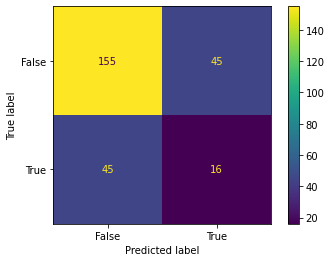

In [52]:
# Plot the confusion matrix
plot_confusion_matrix(model, x_test, y_test)